In [64]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
#storing the dataset into the variable dataset, also making the "DATE" column the index column
dataset = pd.read_csv("weather.csv", index_col="DATE")


Saving weather.csv to weather (1).csv


In [65]:
#For each column, store the percentage of missing values
miss_pct = dataset.apply(pd.isnull).sum()/dataset.shape[0]

In [66]:
#print the missing values percentages for each column
miss_pct

,0
STATION,0.000000
NAME,0.000000
ACMH,0.524697
ACSH,0.524549
AWND,0.253967
FMTM,0.496925
PGTM,0.281145
PRCP,0.000099
PSUN,0.746528
SNOW,0.000000


In [67]:
#list columns with low miss_pct (good columns) "feel free to tweak the threshold of how low we want missing values to be"
good_columns = dataset.columns[miss_pct < 0.01]

In [68]:
good_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN'], dtype='object')

In [69]:
dataset = dataset[good_columns].copy()

In [70]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18
...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35


In [71]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

,0
STATION,0.000000
NAME,0.000000
PRCP,0.000099
SNOW,0.000000
TMAX,0.000000
TMIN,0.000000


In [72]:
#Since the "PRCP" column has missin values, we fill the missing values with zero since
#if there was no PRCP recorded for that day then that must mean that it did not rain therefore PRCP would be zero

dataset["PRCP"] = dataset["PRCP"].fillna(0)

In [73]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

,0
STATION,0.0
NAME,0.0
PRCP,0.0
SNOW,0.0
TMAX,0.0
TMIN,0.0


In [74]:
dataset.dtypes

,0
STATION,object
NAME,object
PRCP,float64
SNOW,float64
TMAX,int64
TMIN,int64


In [75]:
dataset.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
       '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16'],
      dtype='object', name='DATE', length=20164)

In [76]:
#Change dtype from object to datetime
dataset.index = pd.to_datetime(dataset.index)

In [77]:
dataset.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-15', '2025-03-16'],
              dtype='datetime64[ns]', name='DATE', length=20164, freq=None)

In [78]:
#Example of why convertingg dates from object to dates is helpful:
dataset.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=20164)

In [79]:
#Check for gaps in dataset (if certain years have more rows than others, ideally each year should have around 365 ish rows)
dataset.index.year.value_counts().sort_index()

,count
DATE,
1970,365
1971,365
1972,366
1973,365
1974,365
1975,365
1976,366
1977,365
1978,365


<Axes: xlabel='DATE'>

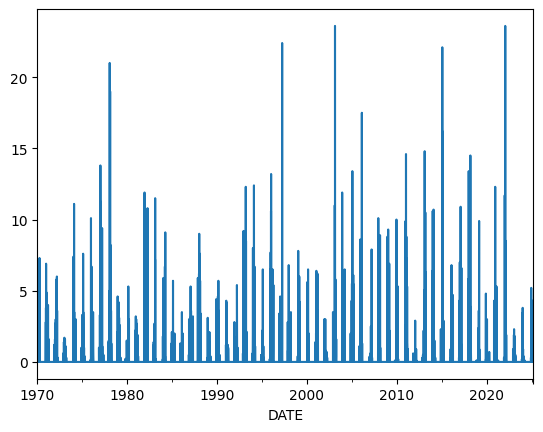

In [ ]:
#Plot of snow depth in Boston.
dataset["SNOW"].plot()

In [80]:
dataset["tmrw_rain"] = (dataset["PRCP"].shift(-1) > 0).astype(int)
dataset = dataset.dropna(subset=["tmrw_rain"])

In [81]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_rain
DATE,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,1
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,1
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,0
...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,0


In [86]:
#Filling last tmrw_rain with the one before since we don't know tmrw_rain actual temp for a day that has not yet come!
dataset = dataset.ffill()


In [87]:
dataset

,STATION,NAME,PRCP,SNOW,TMAX,TMIN,tmrw_rain
DATE,,,,,,,
1970-01-01,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,29,16,0
1970-01-02,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,28,19,1
1970-01-03,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.14,2.2,30,17,1
1970-01-04,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.02,0.2,27,19,0
1970-01-05,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,30,18,0
...,...,...,...,...,...,...,...
2025-03-12,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,50,33,0
2025-03-13,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,44,34,0
2025-03-14,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",0.00,0.0,46,35,0


In [85]:
#Using pearson correlation coefficient between the numeric predictors
dataset.corr(numeric_only=True)

,PRCP,SNOW,TMAX,TMIN,tmrw_rain
PRCP,1.000000,0.214544,-0.032403,0.022414,0.113442
SNOW,0.214544,1.000000,-0.196973,-0.192492,0.034222
TMAX,-0.032403,-0.196973,1.000000,0.943460,-0.044009
TMIN,0.022414,-0.192492,0.943460,1.000000,-0.012280
tmrw_rain,0.113442,0.034222,-0.044009,-0.012280,1.000000


In [ ]:
#As we can see, TMAX and TMIN are heavily correlated, TMAX and tmrw_rain are also heavily correlated. Other predictors are not highly correlated which makes sense

In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Gradient Boosting Classifier
gbr_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [109]:
def backtest(weather, model, predictors, target="tmrw_rain", start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train[target])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test[target], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["actual"] != combined["prediction"]).astype(int)

        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [111]:
predictions_rf_10 = backtest(dataset, model, predictors)
predictions_xgb_10 = backtest(dataset, xgb_model, predictors)
predictions_gbr_10 = backtest(dataset, gbr_model, predictors)

In [100]:
predictions_10

,actual,prediction,diff
DATE,,,
1979-12-30,0,0.347596,0.347596
1979-12-31,0,0.343742,0.343742
1980-01-01,0,0.362551,0.362551
1980-01-02,0,0.368821,0.368821
1980-01-03,0,0.360509,0.360509
...,...,...,...
2025-03-12,0,0.319710,0.319710
2025-03-13,0,0.364305,0.364305
2025-03-14,0,0.357775,0.357775


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [112]:
#Measurin how accurate our model is using mean absolute error:
from sklearn.metrics import accuracy_score

# Evaluate each model's prediction accuracy
print("Random Forest Accuracy:", accuracy_score(predictions_rf["actual"], predictions_rf["prediction"]))
print("XGBoost Accuracy:", accuracy_score(predictions_xgb["actual"], predictions_xgb["prediction"]))
print("Gradient Boosting Accuracy:", accuracy_score(predictions_gbr["actual"], predictions_gbr["prediction"]))


Random Forest Accuracy: 0.6137216906866901
XGBoost Accuracy: 0.6584715998546687
Gradient Boosting Accuracy: 0.661983771345525


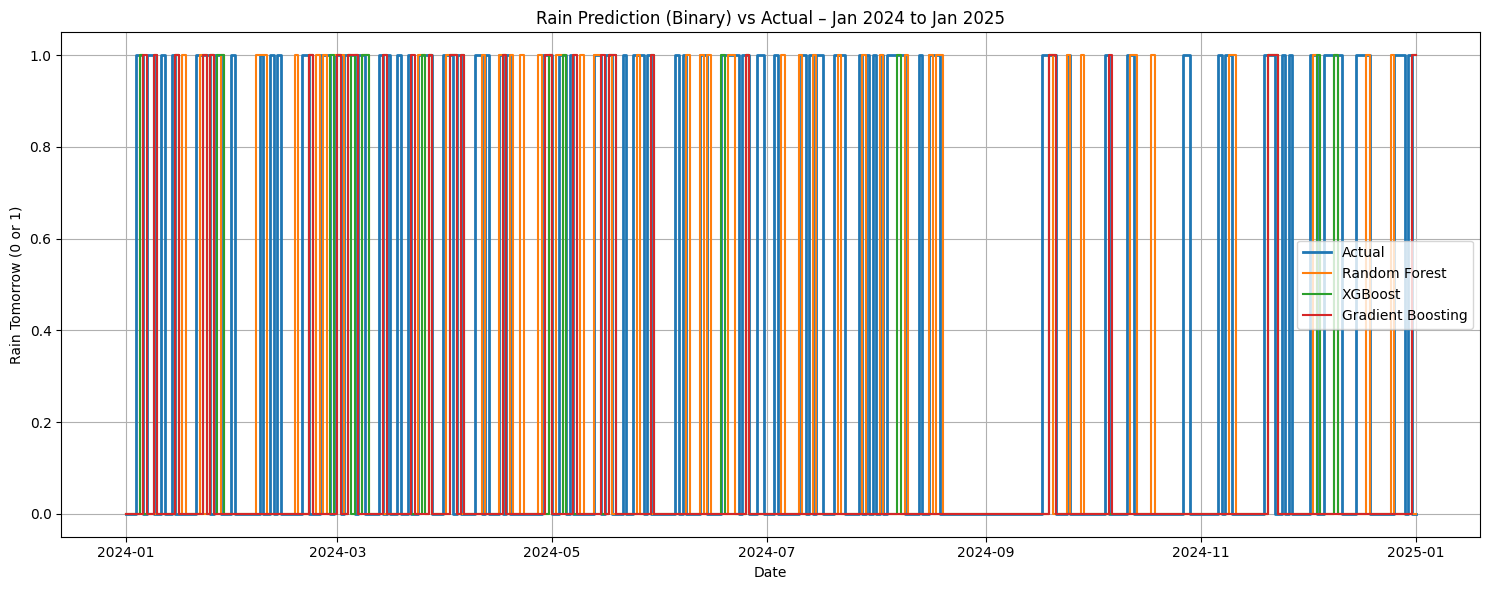

In [115]:
# Threshold predictions to binary
for df in [predictions_rf, predictions_xgb, predictions_gbr]:
    df["pred_binary"] = (df["prediction"] > 0.5).astype(int)

# Pick a 1-year window
start_date = "2024-01-01"
end_date = "2025-01-01"

plot_rf = predictions_rf.loc[start_date:end_date]
plot_xgb = predictions_xgb.loc[start_date:end_date]
plot_gbr = predictions_gbr.loc[start_date:end_date]

plt.figure(figsize=(15, 6))
plt.step(plot_rf.index, plot_rf["actual"], label="Actual", linewidth=2)
plt.step(plot_rf.index, plot_rf["pred_binary"], label="Random Forest")
plt.step(plot_xgb.index, plot_xgb["pred_binary"], label="XGBoost")
plt.step(plot_gbr.index, plot_gbr["pred_binary"], label="Gradient Boosting")

plt.legend()
plt.title("Rain Prediction (Binary) vs Actual – Jan 2024 to Jan 2025")
plt.xlabel("Date")
plt.ylabel("Rain Tomorrow (0 or 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
#Attempting to improve accuracy (reduce average difference in temperature) by increasing by increasing the amount of data we train on from 10 years to 30 years:
prediction_30 = backtest(dataset, model, predictors, start=3650*3)

In [102]:
prediction_30

,actual,prediction,diff
DATE,,,
1999-12-25,0,0.348563,0.348563
1999-12-26,0,0.301797,0.301797
1999-12-27,0,0.372133,0.372133
1999-12-28,0,0.374131,0.374131
1999-12-29,0,0.361107,0.361107
...,...,...,...
2025-03-12,0,0.320014,0.320014
2025-03-13,0,0.364546,0.364546
2025-03-14,0,0.358008,0.358008


In [104]:
prediction_30["diff"].mean()

np.float64(0.44674216426715124)

In [ ]:
#I noticed a slight reduction, but there seems to be another approach worth investigating to reduce averae error.

In [ ]:
#To do next:
#Explore creating new predictors that prioratizes recent data over old data or something in that regards.